In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
from scipy import interpolate

In [2]:

df_medida = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'Medida', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency': 'freq', ' Formatted Data':'S11_MeasSKY'}, inplace = True)

df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq           float64
S11_MeasSKY    float64
dtype: object

In [58]:

df_medida = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'INPE', decimal=',')
df_medida.dtypes
df_medida.rename(columns = {'Frequency (Hz)': 'freq', 'dB':'S11_MeasINPE'}, inplace = True)

# df_medida['freq'] = df_medida['freq'].astype(float)


df_medida.dtypes

freq              int64
S11_MeasINPE    float64
dtype: object

In [59]:

df_medida2 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'USP1', decimal=',')
df_medida2.dtypes
df_medida2.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP1'}, inplace = True)
df_medida2 = df_medida2.drop(['R'], axis= 1)

df_medida2['freq'] = df_medida2['freq'].astype(float)


df_medida2.dtypes

freq            float64
S11_MeasUSP1    float64
dtype: object

In [60]:
df_medida3 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'USP2', decimal=',')
df_medida3.dtypes
df_medida3.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP2'}, inplace = True)
df_medida3 = df_medida3.drop(['R'], axis= 1)

df_medida3['freq'] = df_medida3['freq'].astype(float)


df_medida3.dtypes

freq            float64
S11_MeasUSP2    float64
dtype: object

In [ ]:
df_medida3 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'USP_26.5', decimal=',')
df_medida3.dtypes
df_medida3.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP26.5'}, inplace = True)
df_medida3 = df_medida3.drop(['R'], axis= 1)

df_medida3['freq'] = df_medida3['freq'].astype(float)


df_medida3

In [2]:
df_USP18_26 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'USP18+26', decimal=',')
df_USP18_26.dtypes
df_USP18_26.rename(columns = {'Hz': 'freq', 'S':'S11_MeasUSP18+26'}, inplace = True)
df_USP18_26 = df_USP18_26.drop(['R'], axis= 1)

df_USP18_26['freq'] = df_USP18_26['freq'].astype(float)


df_USP18_26


,freq,S11_MeasUSP18+26
0,1.000000e+08,-0.032205
1,1.111875e+08,-0.023529
2,1.223750e+08,-0.019315
3,1.335625e+08,-0.018001
4,1.447500e+08,-0.014291
...,...,...
3197,2.647875e+10,-18.252590
3198,2.648406e+10,-18.211218
3199,2.648938e+10,-18.129034
3200,2.649469e+10,-18.016817


In [61]:
df_ads = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'ADS', decimal=',')
df_ads.dtypes
df_ads.rename(columns = {'Frequency / GHz':'freq', 'dB(S11_fitted)':'S11_ADS'}, inplace = True)

# df_ads['freq'] = round(df_cst['freq'],2)*10**9
df_ads.dtypes
# df_ads['S11_ADS']

freq       float64
S11_ADS    float64
dtype: object

In [3]:
df_cst = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'CST', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency':'freq', 'S1,1':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0       1.000000e+08
1       1.200000e+08
2       1.400000e+08
3       1.500000e+08
4       1.700000e+08
            ...     
996     1.793000e+10
997     1.795000e+10
998     1.796000e+10
999     1.798000e+10
1000    1.800000e+10
Name: freq, Length: 1001, dtype: float64

In [4]:
df_cst = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'CST_26.5', decimal=',')
df_cst.dtypes
df_cst.rename(columns = {'Frequency':'freq', 'S1,1':'S11_CST'}, inplace = True)

df_cst['freq'] = round(df_cst['freq'],2)*10**9

df_cst['freq']

0      1.000000e+08
1      1.400000e+08
2      1.800000e+08
3      2.200000e+08
4      2.600000e+08
           ...     
657    2.631000e+10
658    2.635000e+10
659    2.639000e+10
660    2.643000e+10
661    2.647000e+10
Name: freq, Length: 662, dtype: float64

In [79]:
df_cst41 = pd.read_excel('Simul X Medidas\Cardioid\Cardioid.xlsx', 'CST KAPPA', decimal=',')
df_cst41.dtypes
df_cst41.rename(columns = {'Frequency':'freq', 'S1,1':'S11_CSTKAPPA'}, inplace = True)

df_cst41['freq'] = round(df_cst['freq'],2)

df_cst41

,freq,S11_CSTKAPPA
0,1.000000e+08,-0.758865
1,1.200000e+08,-0.740553
2,1.400000e+08,-0.719565
3,1.500000e+08,-0.696045
4,1.700000e+08,-0.670149
...,...,...
996,1.793000e+10,-18.249355
997,1.795000e+10,-17.938303
998,1.796000e+10,-17.642796
999,1.798000e+10,-17.362286


In [6]:
# df = pd.merge_ordered(df_cst, df_ads, on='freq')

df = df_cst.merge(df_medida3, how= 'outer', on='freq')
# df2 = df_medida2.merge(df_medida, how= 'outer', on='freq')
# df = df1.merge(df_medida, how= 'outer', on='freq')
# df = df.merge(df2, how= 'outer', on='freq')
# df = df.merge(df_cst41, how='outer', on='freq')
df.sort_values(by='freq', inplace=True)

# df= df.loc[df['freq']<=15e9]

df

,freq,S11_CST,S11_MeasUSP26.5
0,1.000000e+08,-0.007166,-0.006813
662,1.082500e+08,NaN,-0.011447
663,1.165000e+08,NaN,-0.010473
664,1.247500e+08,NaN,-0.012600
665,1.330000e+08,NaN,-0.015773
...,...,...,...
661,2.647000e+10,-14.765462,NaN
3839,2.647525e+10,NaN,-17.387630
3840,2.648350e+10,NaN,-17.298191
3841,2.649175e+10,NaN,-17.240219


In [7]:
nfreq = np.arange(3E9, 15E9, 10E6) # % desejada

f= interpolate.interp1d(df_ads['freq'], df_ads['S11_ADS'])

y_ads = f(nfreq)

y_ads

array([       nan, -17.608884,        nan, ..., -14.765462,        nan,
              nan])

In [66]:
f= interpolate.interp1d(df_cst['freq'], df['S11_CST'])
nfreq = np.arange(3E9, 15E9, 10E6) # % desejada
y_cst = f(nfreq)

y_cst

array([-17.917936 , -17.9503905, -17.982845 , ..., -14.304529 ,
       -14.328565 , -14.352601 ])

In [80]:
f= interpolate.interp1d(df_cst41['freq'], df_cst41['S11_CSTKAPPA'])

y_cst41 = f(nfreq)

y_cst41

array([-16.509982 , -16.56066  , -16.611338 , ..., -12.387044 ,
       -12.4336315, -12.480219 ])

In [81]:
f= interpolate.interp1d(df_medida['freq'], df_medida['S11_MeasINPE'])

y_med1 = f(nfreq)

y_med1

array([-11.13956 , -11.23066 , -11.21657 , ...,  -9.936101,  -9.936661,
        -9.891594])

In [82]:
f= interpolate.interp1d(df_medida2['freq'], df_medida2['S11_MeasUSP1'])

y_med2 = f(nfreq)

y_med2

array([-11.33181239, -11.50659842, -11.59057049, ...,  -9.94950588,
        -9.90682052,  -9.89786732])

In [ ]:
f= interpolate.interp1d(df_medida['freq'], df_medida['S11_MeasUSP2'])

y_med3 = f(nfreq)

y_med3

In [84]:
# d= {'freq': nfreq, 'S11_ADS':y_ads,'S11_CST':y_cst, 'S11_MeasSKY':y_med1, 'S11_MeasUSP1':y_med2, 'S11_MeasUSP2':y_med3}
d= { 'S11_CST41':y_cst41,'S11_CST':y_cst, 'S11_MeasINPE':y_med1, 'S11_MeasUSP2':y_med2}

df = pd.DataFrame(d)
corr_pearson = df.corr(method='pearson')
corr_kendall = df.corr(method='kendall')
corr_spearman = df.corr(method='spearman')

corr_pearson

,S11_CST41,S11_CST,S11_MeasINPE,S11_MeasUSP2
S11_CST41,1.000000,0.879106,0.617562,0.649102
S11_CST,0.879106,1.000000,0.735730,0.771359
S11_MeasINPE,0.617562,0.735730,1.000000,0.968613
S11_MeasUSP2,0.649102,0.771359,0.968613,1.000000


In [9]:
df['S11_CST']

0       -0.007166
662           NaN
663           NaN
664           NaN
665           NaN
          ...    
661    -14.765462
3839          NaN
3840          NaN
3841          NaN
3842          NaN
Name: S11_CST, Length: 3843, dtype: float64

<Figure size 4500x3600 with 0 Axes>

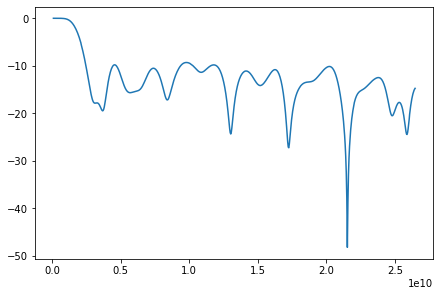

In [11]:
figure(figsize=(15, 12), dpi=300)
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df_cst['freq'], df_cst['S11_CST'], label ='CST')

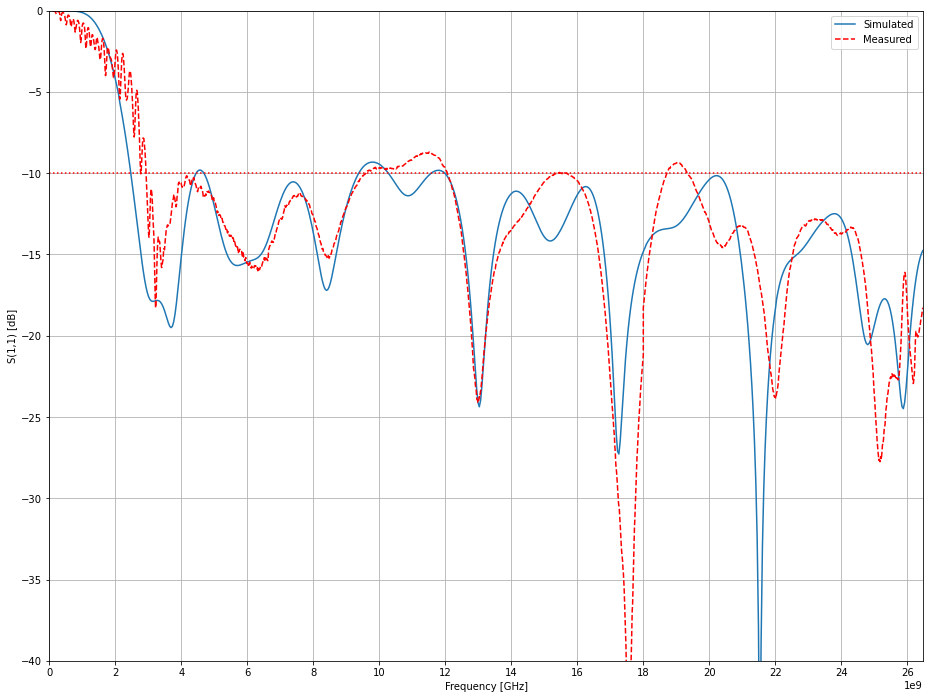

In [5]:
highest_freq = max([max(df_cst['freq']),max(df_cst['freq'])])


# figure(figsize=(30, 24), dpi=300)
fig, ax = plt.subplots(layout = 'constrained', figsize=(6.4*2,4.8*2))
# ax.plot(df_ads['freq'], df_ads['S11_ADS'], label ='ADS')
# ax.plot(df['freq'], df['S11_CST'], label ='CST')
ax.plot(df_cst['freq'], df_cst['S11_CST'],label ='Simulated')
# ax.plot(df['freq'], df['S11_MeasUSP26.5'], label ='USP - 100M - 26.5 GHz')
ax.plot(df_USP18_26['freq'], df_USP18_26['S11_MeasUSP18+26'], '--', label ='Measured', color = 'red')
# ax.plot(df_medida['freq'], df_medida['S11_MeasINPE'], '--',label ='INPE',)
# ax.plot(df_medida2['freq'], df_medida2['S11_Meas2'], label ='Medida 2')
# ax.plot(df_medida2['freq'], df_medida2['S11_MeasUSP'], '--',label ='USP 1',)
# ax.plot(df_medida2['freq'], df_medida2['S11_MeasUSP1'],'--', label ='USP')

plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.ticklabel_format(axis='x', style='sci', scilimits=(9,9))
plt.xticks(range(0, 28*10**9, 2*10**9)) #x scale
ax.set_xlabel('Frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
# ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()
ax.legend()

<Figure size 3000x2400 with 0 Axes>

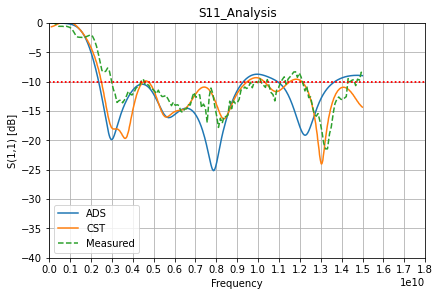

In [ ]:
highest_freq = max([max(df_cst['freq']),max(df_ads['freq'])])


figure(figsize=(15, 12), dpi=200)
fig, ax = plt.subplots( layout = 'constrained')
ax.plot(df['freq'], df['S11_ADS'], label ='ADS')
ax.plot(df['freq'], df['S11_CST'], label ='CST')
ax.plot(df['freq'], df['S11_Meas1'], '--',label ='Measured',)
ax.axhline(y=-10, ls=':', color = 'r')


plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.xticks(range(0, 19*10**9, 1*10**9)) #x scale
ax.set_xlabel('Frequency')  # Add an x-label to the axes.
ax.set_ylabel('S(1,1) [dB]')  # Add a y-label to the axes.
ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, highest_freq), ylim=(-40, 0))
ax.grid()
ax.legend()

In [ ]:
xl = pd.ExcelFile('S11_ADS.xlsx')
sh_names = xl.sheet_names

for name in sh_names:
    print (name)

Sierpinski_simetric
Sierp_Patch_3rd
Sierp_Patch_2rd
MLIN_Slot_Circular
MLIN_Disc_Monopole
MLIN_Disc_Monopole_FEM
MLIN_Cardioid_Monopole
Log_P_Koch_Param_1
Koch_simetric
fit_67
CPW_Disc_Monopole
CPW_Disc_Monopole_FEM
CPW_Cardioid_Monopole
Bowtie_import
Planilha1


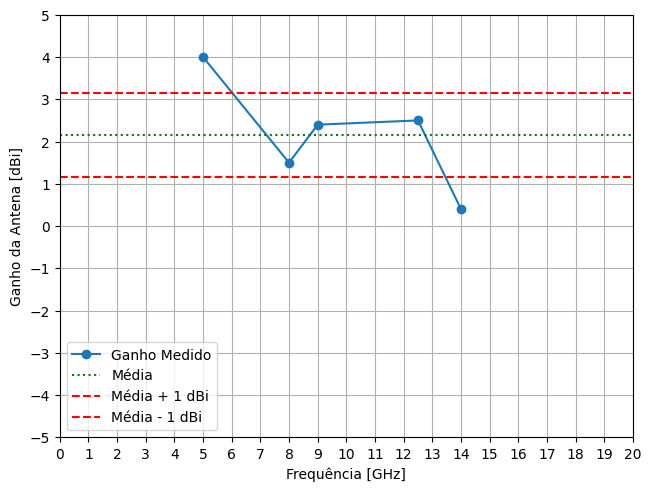

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('Correlations.xlsx', sheet_name='Ganho')



# figure(figsize=(15, 12), dpi=200)
fig, ax = plt.subplots( layout = 'constrained', figsize =(6.4,4.8))
ax.plot(df['freq'], df['gain'], 'o', ls='-', label ='Ganho Medido')

ax.axhline(y=df['gain'].mean(), ls=':', color = 'green', label = 'Média')
ax.axhline(y=df['gain'].mean()+1, ls='dashed', color = 'r', label = 'Média + 1 dBi')
ax.axhline(y=df['gain'].mean()-1, ls='dashed', color = 'r', label = 'Média - 1 dBi')


# plt.axhline(y=-10, ls=':', c='r') #Horizontal Line
plt.xticks(range(0, 21, 1)) #x scale
plt.yticks(range(-5, 6, 1)) #x scale
ax.set_xlabel('Frequência [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Ganho da Antena [dBi]')  # Add a y-label to the axes.
# ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, 20), ylim=(-5, 5))
ax.grid()
ax.legend()


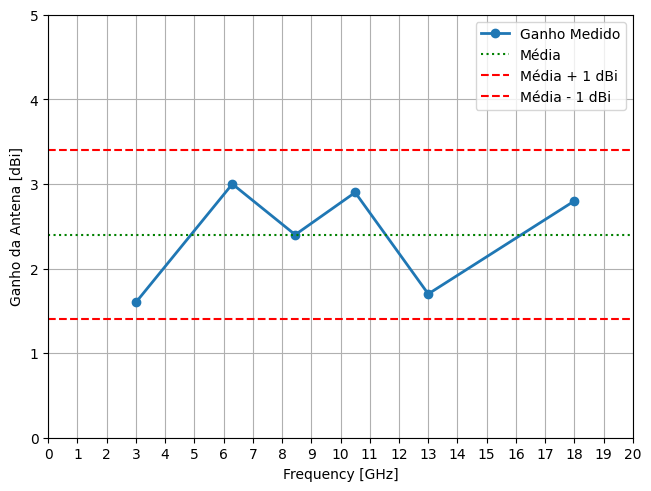

In [2]:
import matplotlib.pyplot as plt
import pandas as pd


d = {'freq': [3, 6.3, 8.45, 10.5, 13, 18], 'gain':[1.6, 3, 2.4, 2.9, 1.7, 2.8]}
df = pd.DataFrame(data=d)
media=df['gain'].mean()

fig, ax = plt.subplots(layout = 'constrained', figsize=(6.4,4.8))

ax.plot(df['freq'], df['gain'], 'o-', linewidth=2, label = "Ganho Medido")

plt.axhline(y=media, ls=':', c='g', label ='Média') #Horizontal Line
plt.axhline(y=media+1, ls='--', c='r', label ='Média + 1 dBi') #Horizontal Line
plt.axhline(y=media-1, ls='--', c='r', label ='Média - 1 dBi') #Horizontal Line
# plt.ticklabel_format(axis='x', style='sci', scilimits=(9,9))
plt.xticks(range(0, 21)) #x scale
plt.yticks(range(0, 6))
ax.set_xlabel('Frequency [GHz]')  # Add an x-label to the axes.
ax.set_ylabel('Ganho da Antena [dBi]')  # Add a y-label to the axes.
# ax.set_title('S11_Analysis')  # Add a title to the axes.
ax.set(xlim=(0, 20), ylim=(0, 5))
ax.grid()
ax.legend()